In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
data = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Data preprocessing
data.dropna(inplace=True)  # Drop rows with missing values
data['Category'] = data['Category'].map({'ham': 0, 'spam': 1})  # Encode target variable

# Feature extraction
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Message'])
y = data['Category']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Confusion Matrix for Logistic Regression:
 [[1445    3]
 [  24  200]]


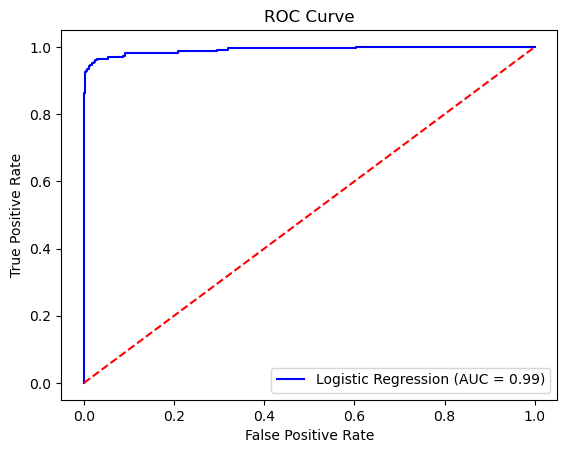

In [7]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Confusion Matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_log_reg)

# ROC Curve for Logistic Regression
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)

plt.figure()
plt.plot(fpr_log_reg, tpr_log_reg, color='blue', label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Confusion Matrix for Decision Tree:
 [[1434   14]
 [  28  196]]


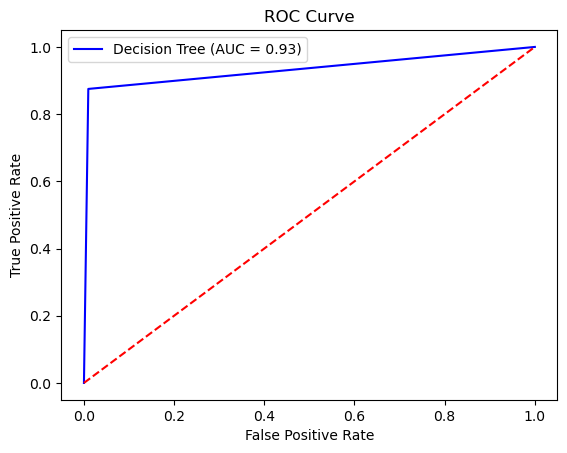

In [8]:
# Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

# Confusion Matrix for Decision Tree
conf_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)
print("Confusion Matrix for Decision Tree:\n", conf_matrix_dtc)

# ROC Curve for Decision Tree
y_prob_dtc = dtc.predict_proba(X_test)[:, 1]
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_prob_dtc)
roc_auc_dtc = roc_auc_score(y_test, y_prob_dtc)

plt.figure()
plt.plot(fpr_dtc, tpr_dtc, color='blue', label=f'Decision Tree (AUC = {roc_auc_dtc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [9]:
# Compare the models
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_log_reg))
print("Classification Report for Decision Tree:\n", classification_report(y_test, y_pred_dtc))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1448
           1       0.99      0.89      0.94       224

    accuracy                           0.98      1672
   macro avg       0.98      0.95      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1448
           1       0.93      0.88      0.90       224

    accuracy                           0.97      1672
   macro avg       0.96      0.93      0.94      1672
weighted avg       0.97      0.97      0.97      1672

